<a href="https://colab.research.google.com/github/federto/Sprint-01---02-/blob/main/Sprint_01_Proyect_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,14000000,"34 years, 6 months, 8 days"


##1. Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Use the "contracts.csv" that is provided to you.

1.1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Players with id 1630597 & 1630492 (These guys are a problem ;))

In [ ]:
!pip install nba_api
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.4 MB/s 
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=d64fd402ad247aaf27a04b776db0e7a56a67314835bfadab75b2904265a45c5c
  Stored in directory: /root/.cache/pip/wheels/e3/f4/46/996128675381abc175e306642bae575d372dcf7efc4683e551
Successfully built nba-api
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 6.4 MB/s 


In [ ]:
# import packages
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import commonallplayers,  playercareerstats, commonplayerinfo
import time 
from unidecode import unidecode
import pandas as pd
from datetime import datetime
from datetime import date
from dateutil import relativedelta
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Players with id 1630597 & 1630492 (These guys are a problem ;))

In [ ]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
  
  # We bring the players dataframe from the api
  
  allplayers = commonallplayers.CommonAllPlayers()
  
  df_all = allplayers.common_all_players.get_data_frame()
  
  # We filter by players with games played and assigned teams
  
  df_true_games_played = df_all.loc[df_all["GAMES_PLAYED_FLAG"] == "Y"]
  
  df_team_players_and_true_games_play = df_true_games_played.loc[df_true_games_played["TEAM_ID"] != 0]
  
  # Filter by removing the ids we don't want
  
  df = df_team_players_and_true_games_play.loc[df_team_players_and_true_games_play["PERSON_ID"] != 1630597]
  
  df_1 = df.loc[df["PERSON_ID"] != 1630492]
  
  pass
  
  return df_1



In [ ]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

*Don't change anything in this cell, just make it run correctly*

In [ ]:
if current_players_list.shape == (503, 16):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [ ]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):
    
    # We request the personal info dataframe of the first player in current_players_list
    
    personal =  commonplayerinfo.CommonPlayerInfo(player_id= current_players_list["PERSON_ID"].iloc[0])
    df = personal.get_data_frames()[0]

    # Then we loop the following players and attach them to the df of the first player

    for val in current_players_list["PERSON_ID"].iloc[1:]: 
          personal_info = commonplayerinfo.CommonPlayerInfo(player_id= val)
          df1 = personal_info.get_data_frames()[0]
          df = df.append(df1)
          time.sleep(0.5)
    
    pass
    return df

In [ ]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

*Don't change anything in this cell, just make it run correctly*

In [ ]:
if players_personal_info.shape == (503, 33):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [ ]:

def get_players_career_stats(current_players_list):
  
  # We request the career statistics dataframe of the first player in current_players_list

  careers = playercareerstats.PlayerCareerStats(player_id= current_players_list["PERSON_ID"].iloc[0])
  df = careers.get_data_frames()[1]
  
  # Then we loop the following players and attach them to the df of the first player
  
  for val in current_players_list["PERSON_ID"].iloc[1:]: 
    career = playercareerstats.PlayerCareerStats(player_id= val)
    df1 = career.get_data_frames()[1]
    df = df.append(df1)
    time.sleep(0.5)
  
  pass       
  return df

In [ ]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

*Don't change anything in this cell, just make it run correctly*

In [ ]:
if players_career_stats.shape == (503, 24):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.4- Create a function to find players salary for this season. You can get the list of players and salaries from this file: [contracts.csv](https://drive.google.com/file/d/1bxjuIZfMS2_kickukdC3ggdXIVeZE5y7/view?usp=sharing). Download and use this file as input for your function `get_nba_players_salaries()`.

Also, inside this function, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

*Hint:* Using data from the Basketball Reference page, you will have to solve 3 kinds of problems:
1. Special characters that need to be removed.
2. Duplicated values (for which you should keep just the first value) and,
3. Players names not matching with the ones from the API. 

The latter problem has multiple causes, one of them is that some names are written with non ascii characters, we advice you to install and use [Unidecode](https://pypi.org/project/Unidecode/) library to solve this issue.

In [ ]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):    
  
  # We read the csv, convert it to df and rename its columns

  csv_file_path = pd.read_csv("contracts.csv")

  df = pd.DataFrame(csv_file_path)

  df = df.rename(columns = {"Unnamed: 0": "Rk", 'Unnamed: 1': "PLAYER_NAME", "Unnamed: 2" : "Tm", "Salary" : "SALARY" ,"Salary.1":"2022-23", "Salary.2":"2023-24", "Salary.3":"2024-25",	"Salary.4":"2025-26", "Salary.5	":"2026-27", "Unnamed: 9":"Signed Using",	"Unnamed: 10":"Guaranteed" })  

  # We loop over each row and split to clean the names 
  
  for val in df["PLAYER_NAME"]:
    x = val.split("\\", 1)
  
    y = x[0]
  
    df["PLAYER_NAME"] = df["PLAYER_NAME"].replace(val, y)

  # We apply unidecode for special characters
  df["PLAYER_NAME"] = df["PLAYER_NAME"].apply(unidecode)

  # Drop the duplicates getting only the first values
  df = df.drop_duplicates(subset= ["PLAYER_NAME"], keep='first')

  # Matching with the current players names and keeping the coincidences 
  df = df.loc[df["PLAYER_NAME"].isin(current_players_list["DISPLAY_FIRST_LAST"])]
  
  # Replacing the $ with an empty string
  df["SALARY"] = df["SALARY"].str.replace("$", "")

  return df



In [ ]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


*Don't change anything in this cell, just make it run correctly*

In [ ]:
players_salaries

,Rk,PLAYER_NAME,Tm,SALARY,2022-23,2023-24,2024-25,2025-26,Salary.5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,45780966,$48070014,$51915615,$55761216,$59606817,NaN,Bird Rights,$261134628
2,2,John Wall,HOU,44310840,$47366760,NaN,NaN,NaN,NaN,Bird Rights,$44310840
3,3,Russell Westbrook,LAL,44211146,$47063478,NaN,NaN,NaN,NaN,Bird Rights,$44211146
4,4,James Harden,PHI,43848000,$46872000,NaN,NaN,NaN,NaN,Bird Rights,$43848000
5,5,LeBron James,LAL,41180544,$44474988,NaN,NaN,NaN,NaN,Bird,$85655532
...,...,...,...,...,...,...,...,...,...,...,...
551,551,Haywood Highsmith,MIA,85578,NaN,NaN,NaN,NaN,NaN,NaN,$256734
557,557,Malik Fitts,BOS,85578,NaN,NaN,NaN,NaN,NaN,Minimum Salary,$85578
561,561,Brandon Williams,POR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$53176
563,563,Moses Wright,LAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$53176


In [ ]:
index_salary_1 = players_salaries[players_salaries['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_salary_2 = players_salaries[players_salaries['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if players_salaries.SALARY.loc[index_salary_1] == '34916200' and players_salaries.SALARY.loc[index_salary_2] == '12727273':
    print('Success!')
else:
    raise ValueError('The salaries are incorrect, please review your function')

Success!


1.5- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [ ]:
### Complete in this cell: merge the dataframes

def merge_dataframes(players_personal_info, players_career_stats, players_salaries):
  
  # Mergin players_personal_info and players_career_stats on IDs
  df = players_personal_info.merge(players_career_stats, left_on='PERSON_ID', right_on="PLAYER_ID")
 
  # Mergin again the last dataset(df) with players_salaries on Names
  df =  df.merge(players_salaries, how= "left", left_on="DISPLAY_FIRST_LAST", right_on="PLAYER_NAME")

  # Getting the columns that we want 
  df1 =df[["PLAYER_NAME","TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER","GP", "MIN", "PTS", "REB", "AST", "STL", "BLK","SALARY"]]

  return df1


In [ ]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

*Don't change anything in this cell, just make it run correctly*

In [ ]:
if raw_players_dataset.shape == (503, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


##2. Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value

2.1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [ ]:
players_dataset = raw_players_dataset

In [ ]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary

def copy_and_delete_nan(players_dataset):

  # Getting the no na values  in Salary
  df = players_dataset[players_dataset['SALARY'].notna()]
  
  # Getting the no na values  in Team
  df = df[players_dataset['TEAM_NAME'].notna()]
  
  return df

In [ ]:
working_df = copy_and_delete_nan(raw_players_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


*Don't change anything in this cell, just make it run correctly*

In [ ]:
if working_df.shape == (428, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


2.2- Cast Salary and Birthday columns to its corresponding type (int, datetime)

In [ ]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
  
  # Salary assigned to type Int
  working_df.SALARY = working_df.SALARY.astype("int") 
  
  # Birthdate assigned to type datetime
  working_df.BIRTHDATE =  pd.to_datetime(working_df.BIRTHDATE)

  pass

  return working_df

In [ ]:
cast_columns(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
0,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280
1,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171
2,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550
3,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,6-5,185,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316
499,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000
500,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471
501,Omer Yurtseven,Heat,Center,6-11,275,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065


*Don't change anything in this cell, just make it run correctly*

In [ ]:
if working_df.SALARY.dtype == 'int64' and working_df.BIRTHDATE.dtype == '<M8[ns]':
    print('Success!')
else:
    raise ValueError('The types are incorrect, please review your function')

Success!


Convert height column

In [ ]:
### Complete in this cell: convert height column

def convert_height_column(working_df):
  
  # List with the values ​​assigned to multiply the height column to pass from feet and inches to centimeters
  conversions = [30.48, 2.54]
  
  # Salary assigned to type string
  working_df['HEIGHT'] = working_df['HEIGHT'].astype("str")
  
  # Separating the values ​​and multiplying each one to the list with conversions to obtain the height in cm and round the value
  working_df['HEIGHT'] = working_df['HEIGHT'].str.split('-').apply(pd.Series).astype(int).dot(conversions)
  working_df['HEIGHT'] = working_df['HEIGHT'].astype("float")
  working_df['HEIGHT'] = working_df['HEIGHT'].round()
  working_df['HEIGHT'] = working_df['HEIGHT'].astype("int")
  
  pass
  
  return working_df

In [ ]:
convert_height_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
0,Precious Achiuwa,Raptors,Forward,203,225,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280
1,Steven Adams,Grizzlies,Center,211,265,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171
2,Bam Adebayo,Heat,Center-Forward,206,255,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550
3,Santi Aldama,Grizzlies,Forward-Center,211,215,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,211,250,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,196,185,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316
499,Thaddeus Young,Raptors,Forward,203,235,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000
500,Trae Young,Hawks,Guard,185,164,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471
501,Omer Yurtseven,Heat,Center,211,275,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065


*Don't change anything in this cell, just make it run correctly*

In [ ]:
index_df_1 = working_df[working_df['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_df_2 = working_df[working_df['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if working_df.HEIGHT.loc[index_df_1] == 188 and working_df.HEIGHT.loc[index_df_2] == 196:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.4- Create a function that converts the weight column from pounds to kilograms

In [ ]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
0,Precious Achiuwa,Raptors,Forward,203,225,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280
1,Steven Adams,Grizzlies,Center,211,265,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171
2,Bam Adebayo,Heat,Center-Forward,206,255,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550
3,Santi Aldama,Grizzlies,Forward-Center,211,215,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,211,250,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,196,185,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316
499,Thaddeus Young,Raptors,Forward,203,235,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000
500,Trae Young,Hawks,Guard,185,164,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471
501,Omer Yurtseven,Heat,Center,211,275,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065


In [ ]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
  
  # Multiplying with the conversion to obtain the Kg and round the value
  working_df.WEIGHT = working_df.WEIGHT.astype("int")
  working_df.WEIGHT = working_df.WEIGHT * 0.453592
  working_df.WEIGHT = working_df.WEIGHT.astype("float")
  working_df.WEIGHT = working_df.WEIGHT.round()
  working_df.WEIGHT = working_df.WEIGHT.astype("int")
  
  return  working_df
 


In [ ]:
convert_weight_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
0,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280
1,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171
2,Bam Adebayo,Heat,Center-Forward,206,116,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550
3,Santi Aldama,Grizzlies,Forward-Center,211,98,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,211,113,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,196,84,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316
499,Thaddeus Young,Raptors,Forward,203,107,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000
500,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471
501,Omer Yurtseven,Heat,Center,211,125,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065


*Don't change anything in this cell, just make it run correctly*

In [ ]:
if working_df.WEIGHT.loc[index_df_1] == 88 and working_df.WEIGHT.loc[index_df_2] == 93:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


In [ ]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
0,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280
1,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171
2,Bam Adebayo,Heat,Center-Forward,206,116,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550
3,Santi Aldama,Grizzlies,Forward-Center,211,98,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,211,113,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,196,84,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316
499,Thaddeus Young,Raptors,Forward,203,107,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000
500,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471
501,Omer Yurtseven,Heat,Center,211,125,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065


2.5- Create a function that calculates the age in (years, months, days) and saves it in a new string column named "AGE", example: "22 years, 5 months, 25 days" 

In [ ]:
### Complete in this cell: add age column

def add_age_column(working_df):
  
  # Changing date type and making a empty list where assing values
  working_df["BIRTHDATE"] = working_df["BIRTHDATE"].astype("string")
  list_age = []   
  
  # Looping between birthdates to get the age
  for val in working_df["BIRTHDATE"]:
    
    # Get today date
    today = str(date.today())
  
     # Convert string to date object
    start_date = datetime.strptime(val, "%Y-%m-%d")
    end_date = datetime.strptime(today, "%Y-%m-%d")

    # Get the relativedelta between two dates and creating a string to append to the list
    delta = relativedelta.relativedelta(end_date, start_date)
    x = str(delta.years) + "  " + 'Years, ' + str(delta.months) + "  " + 'Months, ' + str(delta.days)+ "  "  + 'Days'
    list_age.append(x)
  
  # We assign the values ​​of the list to the age column
  working_df["AGE"] = list_age
  
  return working_df 

In [ ]:
add_age_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
0,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280,"22 Years, 10 Months, 2 Days"
1,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171,"29 Years, 0 Months, 1 Days"
2,Bam Adebayo,Heat,Center-Forward,206,116,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550,"25 Years, 0 Months, 3 Days"
3,Santi Aldama,Grizzlies,Forward-Center,211,98,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520,"21 Years, 6 Months, 11 Days"
4,LaMarcus Aldridge,Nets,Center-Forward,211,113,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691,"37 Years, 0 Months, 2 Days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,196,84,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316,"30 Years, 2 Months, 25 Days"
499,Thaddeus Young,Raptors,Forward,203,107,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000,"34 Years, 1 Months, 0 Days"
500,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471,"23 Years, 10 Months, 2 Days"
501,Omer Yurtseven,Heat,Center,211,125,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065,"24 Years, 1 Months, 2 Days"


2.6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [ ]:
### Complete in this cell: disambiguation of the position column

def update_position(working_df):

  # Looping separating the values ​​and staying with the first
  for values in working_df["POSITION"]:
    x = values.split("-", 1)
    y = x[0]
    working_df["POSITION"] = working_df["POSITION"].replace(values, y)
  
  pass
  return working_df

In [ ]:
update_position(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
0,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,134,2462.0,968,681,111,57,69,2711280,"22 Years, 10 Months, 2 Days"
1,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,9,12,664,17811.0,6157,5303,982,588,629,17073171,"29 Years, 0 Months, 1 Days"
2,Bam Adebayo,Heat,Center,206,116,USA,1997-07-18,5,14,343,9666.0,4617,2850,1189,340,309,28103550,"25 Years, 0 Months, 3 Days"
3,Santi Aldama,Grizzlies,Forward,211,98,Spain,2001-01-10,1,30,32,360.0,132,87,21,6,10,1994520,"21 Years, 6 Months, 11 Days"
4,LaMarcus Aldridge,Nets,Center,211,113,USA,1985-07-19,16,2,1076,36242.0,20558,8736,2076,758,1187,2641691,"37 Years, 0 Months, 2 Days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,196,84,USA,1992-04-26,7,20,411,8577.0,2952,1318,1246,474,148,8526316,"30 Years, 2 Months, 25 Days"
499,Thaddeus Young,Raptors,Forward,203,107,USA,1988-06-21,15,12,1085,31778.0,13848,6345,2003,1535,448,14190000,"34 Years, 1 Months, 0 Days"
500,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,4,5,280,9400.0,7076,1085,2544,262,42,8326471,"23 Years, 10 Months, 2 Days"
501,Omer Yurtseven,Heat,Center,211,125,Turkey,1998-06-19,1,Undrafted,56,706.0,299,294,49,17,20,1489065,"24 Years, 1 Months, 2 Days"


*Don't change anything in this cell, just make it run correctly*

In [ ]:
if working_df.POSITION.loc[index_df_1] == 'Guard' and working_df.POSITION.loc[index_df_2] == 'Guard':
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [ ]:
# Assigning the corresponding data types

working_df["COUNTRY"] = working_df["COUNTRY"].astype("category")
working_df["PLAYER_NAME"] = working_df["PLAYER_NAME"].astype("string")
working_df["TEAM_NAME"] = working_df["TEAM_NAME"].astype("category")
working_df["POSITION"] = working_df["POSITION"].astype("category")
working_df["BIRTHDATE"] = pd.to_datetime(working_df["BIRTHDATE"])
working_df["DRAFT_NUMBER"] = working_df["DRAFT_NUMBER"].astype("category")
working_df["MIN"] = working_df["MIN"].astype("int")
working_df["SALARY"] = working_df["SALARY"].astype("int")

In [ ]:
working_df.to_csv("nba_players_processed_dataset.csv")

##3. Analyzing and Visualizing data

3.1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (as a string, like: "22 years, 5 months, 25 days")
        - Oldest player age (as a string, like: "40 years, 2 months, 3 days")
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

Now that we have the data, let's do some work

In [ ]:
### Complete in this cell: print general metrics

print("Total number of players :", working_df["PLAYER_NAME"].value_counts().sum())

print("Number of USA born players :", len(working_df[working_df['COUNTRY']=='USA']))

print("Number of foreign players :", len(working_df[working_df['COUNTRY']!='USA']))

print("Number of players per position :",  working_df["POSITION"].value_counts())

print("Number of players per team :", working_df["TEAM_NAME"].value_counts())

print("Number of rookies (first year players) :", len(working_df[working_df['SEASON_EXP'] == 1]))


Total number of players : 428
Number of USA born players : 323
Number of foreign players : 105
Number of players per position : Guard      200
Forward    169
Center      59
Name: POSITION, dtype: int64
Number of players per team : Lakers           18
Cavaliers        17
Rockets          17
76ers            16
Bulls            16
Trail Blazers    16
Raptors          16
Pistons          16
Jazz             16
Nuggets          16
Suns             15
Pelicans         15
Wizards          15
Grizzlies        15
Hawks            14
Bucks            14
Nets             14
Hornets          14
Heat             14
Thunder          13
Kings            13
Magic            13
Warriors         12
Celtics          12
Knicks           12
Clippers         12
Spurs            12
Pacers           12
Mavericks        12
Timberwolves     11
Name: TEAM_NAME, dtype: int64
Number of rookies (first year players) : 54


In [ ]:
### Complete in this cell: print players descriptions

print("Average player age :", str((pd.to_datetime('today') - working_df["BIRTHDATE"]).mean() / 365)[0:2], "Years")

print("Youngest player age :", working_df.loc[working_df['BIRTHDATE'] == working_df['BIRTHDATE'].max(), 'AGE'].iloc[0])

print("Oldest player age :", working_df.loc[working_df['BIRTHDATE'] == working_df['BIRTHDATE'].min(), 'AGE'].iloc[0])

print("Min and Max players height : ", "Min :", working_df["HEIGHT"].min() , "Max :", working_df["HEIGHT"].max())

print("Average height of players per position :",  working_df.groupby(["POSITION"])["HEIGHT"].mean())


Average player age : 27 Years
Youngest player age : 19  Years, 6  Months, 27  Days
Oldest player age : 42  Years, 1  Months, 12  Days
Min and Max players height :  Min : 178 Max : 221
Average height of players per position : POSITION
Center     210.813559
Forward    203.023669
Guard      192.575000
Name: HEIGHT, dtype: float64


In [ ]:
### Complete in this cell: Contracts

# Min and Max salary of all players
print("Min and Max salary of all players :", "Min :", working_df["SALARY"].min(), "Max :", working_df["SALARY"].max())

# Mean and Median salary of all players
print("Mean and Median salary of all players :", " Mean :", working_df["SALARY"].mean(), "Median", working_df["SALARY"].median())

Min and Max salary of all players : Min : 85578 Max : 45780966
Mean and Median salary of all players :  Mean : 9019999.885514019 Median 4672995.0


3.2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

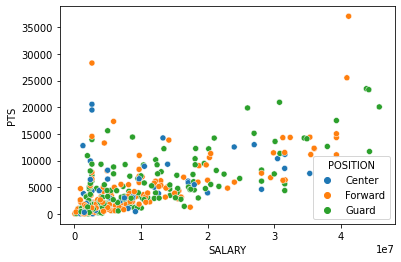

In [ ]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)

# Relationship between scoring and salary (in millions of dollars)
sns.scatterplot(x= "SALARY", y= "PTS", hue="POSITION",data=working_df)

3.3- Now plot assists-vs-salary and rebounding-vs-salary

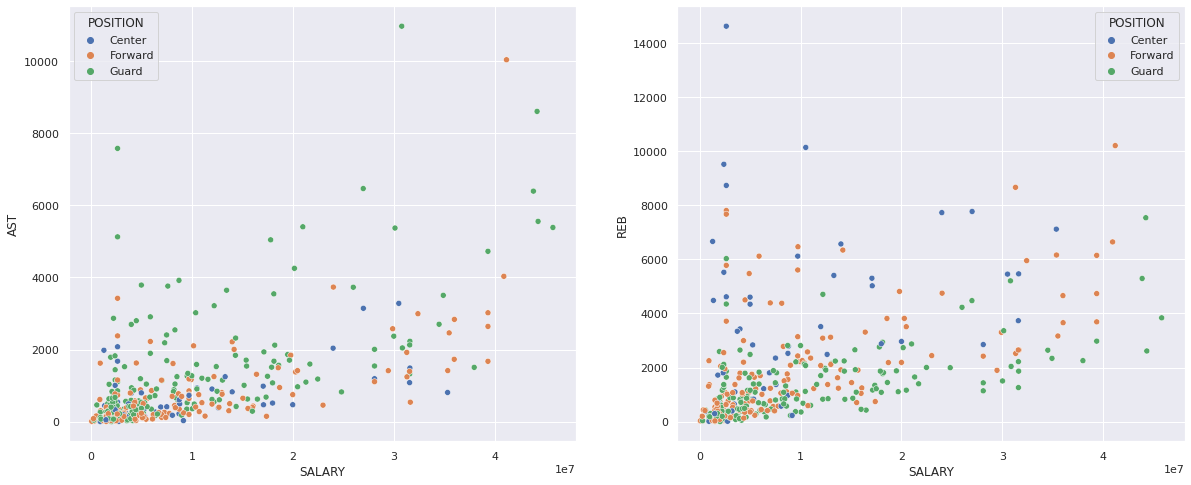

In [ ]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary

sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(ncols=2)

# assist-vs-salary
sns.scatterplot(x= "SALARY", y= "AST", hue="POSITION",data=working_df,  ax=axs[0])

# rebounding-vs-salary
sns.scatterplot(x= "SALARY", y= "REB", hue="POSITION",data=working_df, ax=axs[1])

3.4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

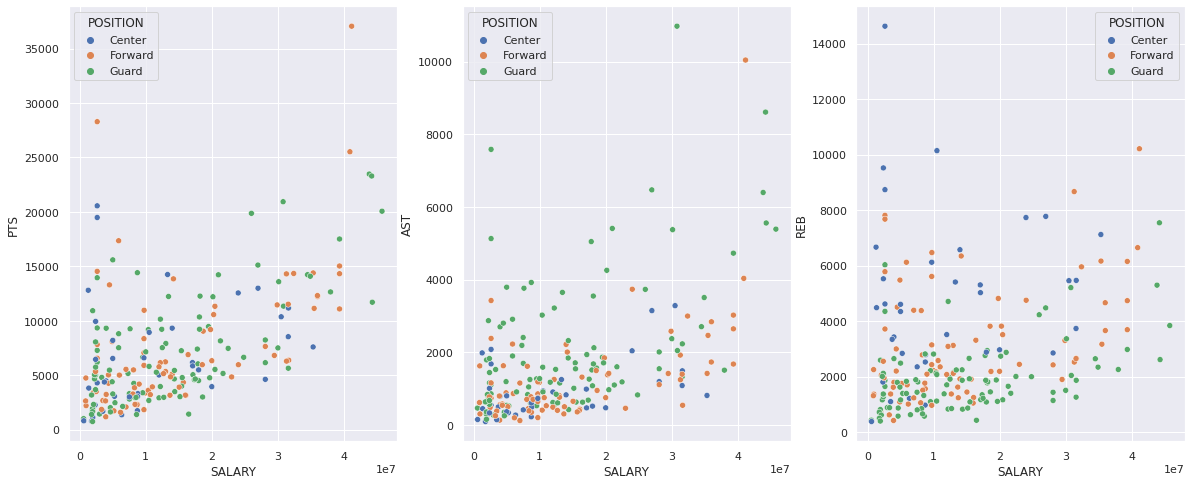

In [ ]:
### Complete in this cell: non rookie contracts

# Players with more than 4 years of experience
no_rookies = working_df[working_df['SEASON_EXP'] > 4]

sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(ncols=3)

sns.scatterplot(x= "SALARY", y= "PTS", hue="POSITION", data=no_rookies, ax=axs[0])
sns.scatterplot(x= "SALARY", y= "AST", hue="POSITION", data=no_rookies, ax=axs[1])
sns.scatterplot(x= "SALARY", y= "REB", hue="POSITION", data=no_rookies, ax=axs[2] )

3.5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

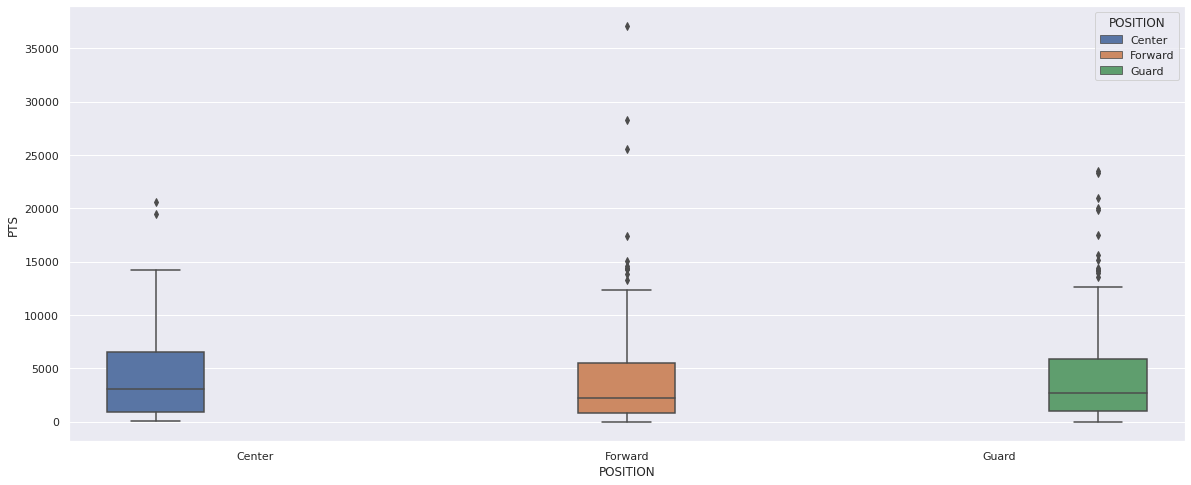

In [ ]:
### Complete in this cell: Scoring average grouped by position


sns.boxplot(data=working_df, y= "PTS", x = "POSITION", hue = "POSITION")

3.6- Plot the Height distribution of all players

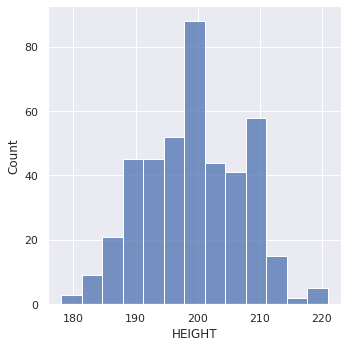

In [ ]:
### Complete in this cell: height distribution

sns.displot(data=working_df, x="HEIGHT")

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)